In [1]:
import os
import sys

from scipy import stats
import price_download
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set_style("whitegrid")

In [12]:
tickers = ['^GSPC']

df = price_download.price_dl_all(tickers, '2012-01-01', str(datetime.date.today()))['Adj Close']

df.head(5)

Symbols,^GSPC
Date,
2012-01-03,1277.060059
2012-01-04,1277.300049
2012-01-05,1281.060059
2012-01-06,1277.810059
2012-01-09,1280.699951


In [3]:
df1 = np.log(df/df.shift(1)).dropna()
df1

Symbols,^GSPC
Date,
2012-01-04,0.000188
2012-01-05,0.002939
2012-01-06,-0.002540
2012-01-09,0.002259
2012-01-10,0.008847
...,...
2022-02-22,-0.010195
2022-02-23,-0.018584
2022-02-24,0.014846


In [4]:
df1 = df1.groupby(pd.Grouper(freq='W-Fri'))['^GSPC'].sum()

In [5]:
df1

Date
2012-01-06    0.000587
2012-01-13    0.008789
2012-01-20    0.020189
2012-01-27    0.000722
2012-02-03    0.021472
                ...   
2022-02-04    0.015378
2022-02-11   -0.018363
2022-02-18   -0.015916
2022-02-25    0.008194
2022-03-04   -0.002446
Freq: W-FRI, Name: ^GSPC, Length: 531, dtype: float64

In [6]:
# PROCESS

# generate std

std = df1.std()

# calculate mean returns
avg_return = df1.mean()

avg_return

0.0023184624941497093

In [7]:
# find weekly VAR

# set critical level
critical_level = 0.07

# find critical investment value
cutoff1 = stats.norm.ppf(critical_level, avg_return, std)
cutoff2 = stats.norm.ppf((1-critical_level), avg_return, std)



In [8]:
print(f'weekly log VAR at 7%： {cutoff1}')
print(f'weekly potential return :D {cutoff2}')

weekly log VAR at 7%： -0.029176549137157608
weekly potential return :D 0.03381347412545701


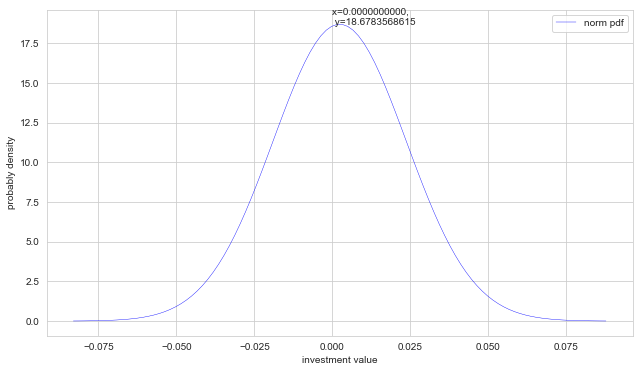

In [9]:
# plot pdf

fig, ax = plt.subplots()

x = np.linspace(avg_return - 4 * std,
                avg_return + 4 * std, 100)

y = stats.norm.pdf(x, avg_return, std,)

ax.plot(x, y, color='b', linestyle='-',
        linewidth=0.4, label='norm pdf')

ax.set_xlabel('investment value')
ax.set_ylabel('probably density')

ymax = max(y)
xmax = np.round(x[np.argmax(y)])
text = "x={:.10f}, \n y={:.10f}".format(xmax, ymax)
ax.annotate(text, xy=(xmax, ymax))
fig.set_size_inches(10.5, 6)
ax.legend()

In [10]:
# calculate n week VaR
var_array = []
num_weeks = 52
for x in range(1, num_weeks+1):
    var_array.append(np.abs(np.round(cutoff1 * np.sqrt(x), 2)))
    print(str(x) + " week VaR at 93% confidence: " +
          str(np.abs(np.round(cutoff1 * np.sqrt(x), 2))))

1 week VaR at 93% confidence: 0.03
2 week VaR at 93% confidence: 0.04
3 week VaR at 93% confidence: 0.05
4 week VaR at 93% confidence: 0.06
5 week VaR at 93% confidence: 0.07
6 week VaR at 93% confidence: 0.07
7 week VaR at 93% confidence: 0.08
8 week VaR at 93% confidence: 0.08
9 week VaR at 93% confidence: 0.09
10 week VaR at 93% confidence: 0.09
11 week VaR at 93% confidence: 0.1
12 week VaR at 93% confidence: 0.1
13 week VaR at 93% confidence: 0.11
14 week VaR at 93% confidence: 0.11
15 week VaR at 93% confidence: 0.11
16 week VaR at 93% confidence: 0.12
17 week VaR at 93% confidence: 0.12
18 week VaR at 93% confidence: 0.12
19 week VaR at 93% confidence: 0.13
20 week VaR at 93% confidence: 0.13
21 week VaR at 93% confidence: 0.13
22 week VaR at 93% confidence: 0.14
23 week VaR at 93% confidence: 0.14
24 week VaR at 93% confidence: 0.14
25 week VaR at 93% confidence: 0.15
26 week VaR at 93% confidence: 0.15
27 week VaR at 93% confidence: 0.15
28 week VaR at 93% confidence: 0.15
29 

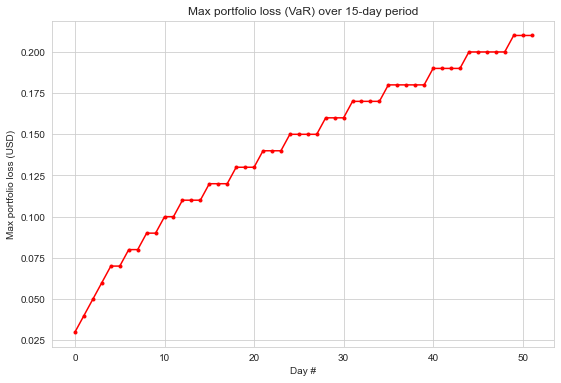

In [11]:
# build plot

fig, ax = plt.subplots()

ax.set_xlabel("Day #")
ax.set_ylabel("Max portfolio loss (USD)")
ax.set_title("Max portfolio loss (VaR) over 15-day period")
ax.plot(var_array, "r", marker='.')
fig.set_size_inches(9, 6)